# Libraries

In [1]:
import numpy as np
from numpy import random as rd
from joblib import Parallel, delayed
from math import gamma, pi 
import matplotlib.pyplot as plt
rd.seed(12163)

## Παραδοτέο 1α

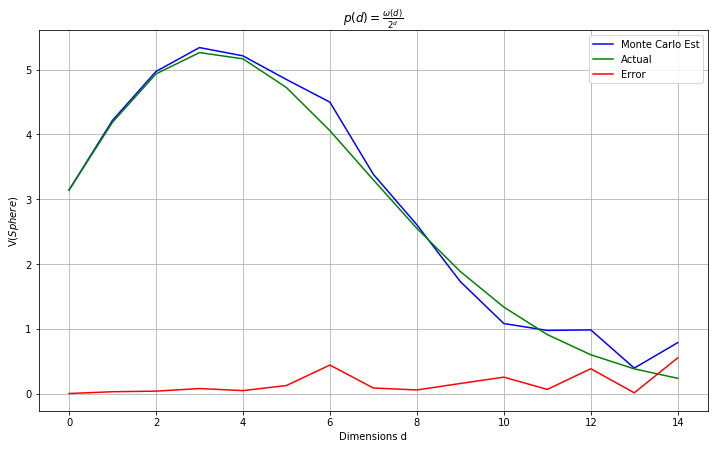

<Figure size 432x288 with 0 Axes>

Monte Carlo: 
 [3.140528 4.21716  4.9724   5.341376 5.213632 4.848896 4.4992   3.38432
 2.60608  1.728512 1.081344 0.974848 0.98304  0.393216 0.786432]
Actual: 
 [3.14159265 4.1887902  4.9348022  5.26378901 5.16771278 4.72476597
 4.05871213 3.2985089  2.55016404 1.88410388 1.33526277 0.91062875
 0.59926453 0.38144328 0.23533063]
Error: 
 [0.00106465 0.0283698  0.0375978  0.07758699 0.04591922 0.12413003
 0.44048787 0.0858111  0.05591596 0.15559188 0.25391877 0.06421925
 0.38377547 0.01177272 0.55110137]


In [2]:
def vol_Aux(d):
    x = rd.uniform(-1,1,d)
    return (sum(x ** 2) < 1)

def vol(N,d):
    # Parallel prossesing for more speed!!!
    results = Parallel(n_jobs=-1, backend="multiprocessing")(
             map(delayed(vol_Aux), [d for i in range(N)]))
    nhits = sum(results)
    return (2 ** d * nhits / N)


def Vol1(d):
    x = d/2
    return pi ** x / gamma(x + 1)

d = 2
N = 1_000_000
MonteCarlo = []
Actual = []
Error = []
while True:
    current = vol(N,d)
    if current == 0: break
    actual = Vol1(d)
    MonteCarlo.append(current)
    Actual.append(actual)
    Error.append(abs(actual - current))
    d += 1

plt.figure(figsize=(12, 7))
plt.subplot()
plt.plot(MonteCarlo, color = 'b', label = 'Monte Carlo Est')
plt.plot(Actual, color = 'g', label = 'Actual')
plt.plot(Error, color = 'r', label = 'Error')
plt.xlabel(r'Dimensions d')
plt.ylabel(r'V($Sphere$)')
plt.title(r'$p(d) = \frac{\omega (d)}{2^d}$')
plt.legend()
plt.grid()
plt.show()
plt.cla()
plt.clf()
print( "Monte Carlo: \n", np.array(MonteCarlo) )
print("Actual: \n", np.array(Actual))
print("Error: \n", np.array(Error))

## Παραδοτέο 1β

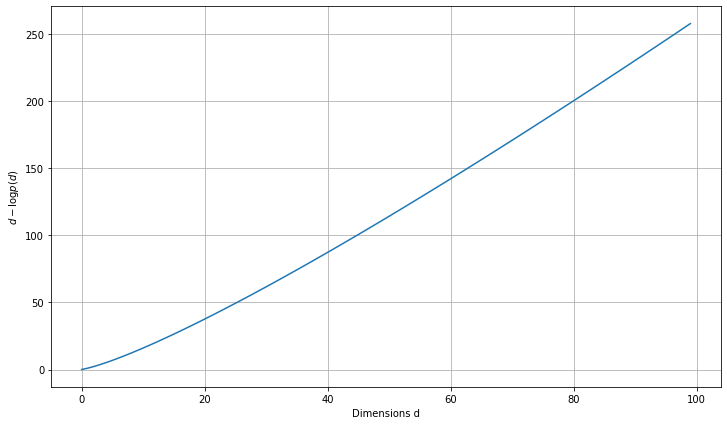

<Figure size 432x288 with 0 Axes>

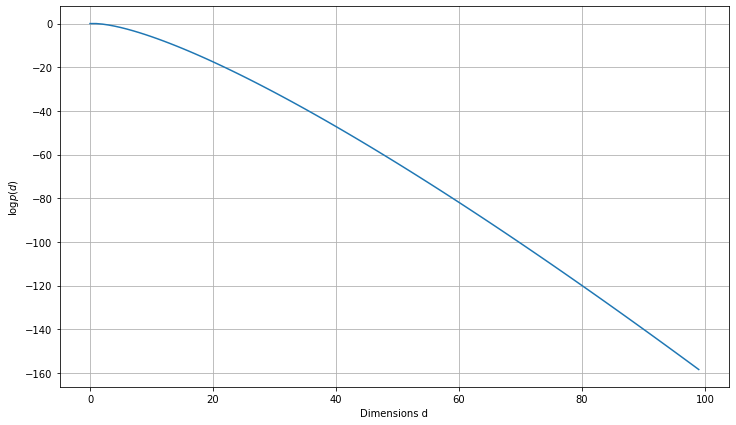

<Figure size 432x288 with 0 Axes>

In [3]:
def Vol1(d):
    x = d/2
    return (pi ** x / gamma(x + 1))/2**d

plt.figure(figsize=(12, 7))
plt.subplot()
plt.plot([d-np.log(Vol1(d)) for d in range(100)] )
plt.xlabel(r'Dimensions d')
plt.ylabel(r'$d - \log{p(d)}$')
plt.grid()
plt.show()
plt.cla()
plt.clf()

plt.figure(figsize=(12, 7))
plt.subplot()
plt.plot([np.log(Vol1(d)) for d in range(100)] )
plt.xlabel(r'Dimensions d')
plt.ylabel(r'$\log{p(d)}$')
plt.grid()
plt.show()
plt.cla()
plt.clf()

Καθώς αυξάνεται η διάσταση που μελετάμε, μειώνεται δραστικά η πιθανότητα να πέσει το τυχαίο σημείο μέσα στη σφαίρα οπότε έχουμε πολύ μικρότερο δείγμα επιτυχιών σε σχέση με το πλήθος όλων των προσπαθειών.

(Επειδή δεν ήμουν σίγουρος αν ζητήται η γραφική παράσταση "$d - \log p(d)$" ή "$\log p(d)$" έτσι τις έκανα και τις δύο)

## Παραδοτέο 1γ
Αν θέλαμε να πάρουμε 1 δείγμα μέσα στη μοναδιαία μπάλα 20 διαστάσεων, τότε η πιθανότητα να πέσει ένα τυχαίο σημείο μέσα στην μπαλα είναι $\frac{\omega(20)}{2^{20}} = \frac{\frac{\pi^{10}}{\Gamma(11)}}{2^{20}} = \frac{\pi^{10}}{2^{20}\cdot \Gamma(11)} = 2.46 \cdot 10^{-8} = \frac{1}{4\cdot 10^{7}}$. Άρα για ένα μόνο δείγμα επιτυχίας χρειάζονται $4\cdot 10^7$ προσπάθειες και για 1000 τέτοια δείγματα θα χρειαστούν περίπου $4 \cdot 10^{10}$ επαναλήψεις στον υπολογιστή μου. Δεδομένου ότι θέλω περίπου $5 sec$ για $1.000.000$ πράξεις στον υπολογιστή μου, τότε θα χρειαστούν $5 \cdot \frac{10^{10}}{10^6} sec = 5 \cdot 10^4 sec = 14\ hours$.

## Παραδοτέο 2α

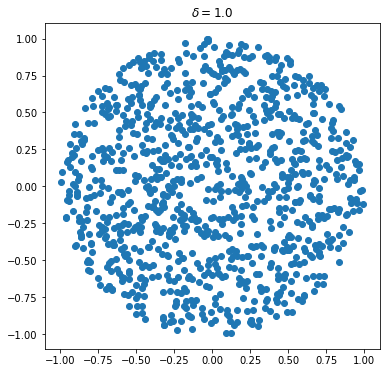

<Figure size 432x288 with 0 Axes>

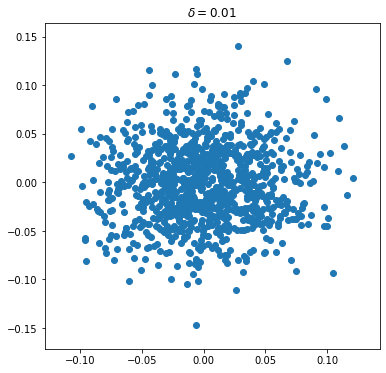

<Figure size 432x288 with 0 Axes>

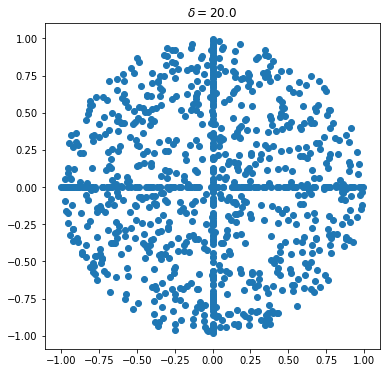

<Figure size 432x288 with 0 Axes>

In [4]:
delta = 1.0
for delta in [1.0,0.01,20.0]:
    N = 100 # number of steps to approach equilibrium
    samples = 1000 
    point_x = []
    point_y = []

    for _ in range(samples):
        x = [0,0]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

        for _ in range(N):
            k = rd.choice([0,1])  ## choose a jump direction at random
            z = rd.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
    
        point_x.append(x[0])
        point_y.append(x[1])
    plt.figure(figsize=(6, 6))
    plt.subplot()
    plt.scatter(point_x,point_y)
    plt.title(r'$\delta = {}$'.format(delta))
    plt.show()
    plt.cla()
    plt.clf()

Όταν το βήμα είναι πολύ μικρό τότε πολύ σπάνια θα φτάνουμε κοντά στο όριο για να βγούμε έξω απο τη μοναδιαία σφαίρα ,εξού και η συσώρευση στο κέντρο. Όταν το βήμα ειναι πολύ μεγάλο θα συμβαινει το αντίθετο έτσι πολύ συχνα θα μένουμε ακίνητοι, εξού και η συσώρευση στους άξονες.

## Παραδοτέο 2β

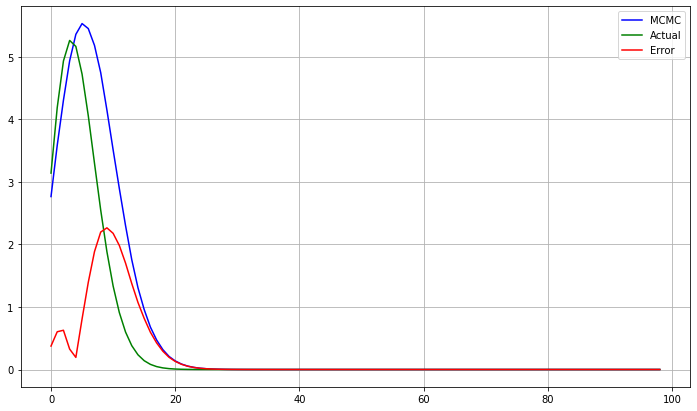

MCMC : 
 [2.76640000e+00 3.58508842e+00 4.30698182e+00 4.93735168e+00
 5.36137144e+00 5.53336424e+00 5.45324112e+00 5.18417821e+00
 4.74870724e+00 4.14999023e+00 3.51338173e+00 2.89439413e+00
 2.30110122e+00 1.75652261e+00 1.30741491e+00 9.59014983e-01
 6.78637363e-01 4.72467332e-01 3.18660317e-01 2.09302469e-01
 1.36787536e-01 8.74044996e-02 5.44547513e-02 3.38316479e-02
 2.03991304e-02 1.23879839e-02 7.26480929e-03 4.19484618e-03
 2.37755492e-03 1.33376076e-03 7.35515708e-04 4.06445980e-04
 2.20244948e-04 1.17509489e-04 6.21296172e-05 3.24739083e-05
 1.67026300e-05 8.44084110e-06 4.26144304e-06 2.12083497e-06
 1.05312181e-06 5.12027826e-07 2.47575694e-07 1.16494267e-07
 5.62178035e-08 2.64437304e-08 1.21836843e-08 5.74899329e-09
 2.68523979e-09 1.24176229e-09 5.66541626e-10 2.49176338e-10
 1.10096073e-10 4.84620895e-11 2.13843816e-11 9.49252700e-12
 4.19114052e-12 1.86111786e-12 7.99945678e-13 3.39176968e-13
 1.42705317e-13 5.99162545e-14 2.50857374e-14 1.05425320e-14
 4.32770939e-15

<Figure size 432x288 with 0 Axes>

In [5]:
def Vol1(d):
    x = d/2
    return pi ** x / gamma(x + 1)

delta = 1.0
N = 100 # number of steps to approach equilibrium
samples = 1000 
Omega = 2
Mcmc = []
McmcOther = []
Actual = []
Error = []
ErrorOther = []
for d in range(2,101):
    nhits = 0
    for _ in range(samples):
        x = [0 for i in range(d)]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

        for _ in range(N):
            k = rd.choice(range(d))  ## choose a jump direction at random
            z = rd.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                nhits += 1
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
    result = 2*Omega*(nhits/(N*samples))
    Mcmc.append(result)
    Omega = result
    McmcOther.append(2*Vol1(d)*(nhits/(N*samples)))
    Actual.append(Vol1(d))
    Error.append(abs(result - Vol1(d)))
    ErrorOther.append(abs(2*Vol1(d)*(nhits/(N*samples)) - Vol1(d)))
plt.figure(figsize=(12, 7))
plt.subplot()
plt.plot(Mcmc, color = 'b', label = 'MCMC')
plt.plot(Actual, color = 'g', label = 'Actual')
plt.plot(Error, color = 'r', label = 'Error')
plt.legend()
plt.grid()
plt.show()
plt.cla()
plt.clf()
print("MCMC : \n",np.array(Mcmc))
print("Actual : \n",np.array(Actual))
print("Error : \n",np.array(Error))

Παρατηρούμε ότι με τον επαγωγικό τρόπο υπολογισμού που ζητήθηκε το σφάλμα συσσωρεύεται και έτσι βλέπουμε μικρή μετατόπιση της γραφικής παράστασης προς τα δεξιά. Έτσι δοκιμάζω να το τρέξω και δίνοντας τις πραγματικές τιμές για τα $\omega(d-1)$.

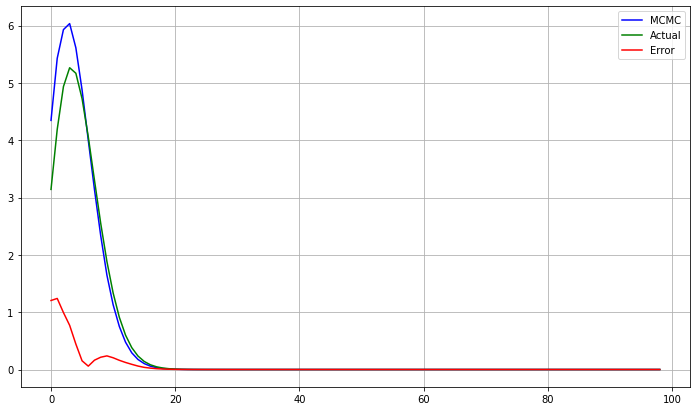

MCMC : 
 [4.34545096e+00 5.42842078e+00 5.92847397e+00 6.03419717e+00
 5.61151595e+00 4.87633646e+00 3.99994197e+00 3.13576047e+00
 2.33595026e+00 1.64655606e+00 1.13043346e+00 7.50194181e-01
 4.76427286e-01 2.91170914e-01 1.75161295e-01 1.03412462e-01
 5.81297152e-02 3.24579586e-02 1.74057160e-02 9.16208097e-03
 4.81687144e-03 2.43493322e-03 1.20216339e-03 5.95013778e-04
 2.81161940e-04 1.35345784e-04 6.13639703e-05 2.78823546e-05
 1.24211840e-05 5.49038977e-06 2.37297075e-06 1.02975191e-06
 4.30905902e-07 1.78484512e-07 7.33807975e-08 2.96925555e-08
 1.18032950e-08 4.62517128e-09 1.81988439e-09 6.98028502e-10
 2.67778156e-10 9.96435830e-11 3.72344591e-11 1.34647497e-11
 5.07600408e-12 1.79942021e-12 6.34376655e-13 2.31462531e-13
 8.08150805e-14 2.79468342e-14 9.53830097e-15 3.15105657e-15
 1.07480283e-15 3.60270507e-16 1.20434295e-16 4.00487128e-17
 1.30544287e-17 4.26651157e-18 1.33083044e-18 4.19611289e-19
 1.32019501e-19 4.14405134e-20 1.28975255e-20 4.00963826e-21
 1.20385248e-21

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(12, 7))
plt.subplot()
plt.plot(McmcOther, color = 'b', label = 'MCMC')
plt.plot(Actual, color = 'g', label = 'Actual')
plt.plot(ErrorOther, color = 'r', label = 'Error')
plt.legend()
plt.grid()
plt.show()
plt.cla()
plt.clf()
print("MCMC : \n",np.array(McmcOther))
print("Actual : \n",np.array(Actual))
print("Error : \n",np.array(ErrorOther))